In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/v005/adv/'
files = sorted(os.listdir(filePath))
files

['volta_Gaussian-adversarial-norm_add_0.0_100_256_8',
 'volta_Gaussian-adversarial-norm_add_0.0_10_256_8',
 'volta_Gaussian-adversarial_add_0.0_1000_256_8',
 'volta_Gaussian-adversarial_add_0.0_100_256_8']

In [11]:
res = []
for file in files:
    filePath = '/Users/yufanwang/Desktop/Study/Project/Data/v005/adv/'+file+'/attacks'
    att_files = sorted(os.listdir(filePath))
    for i in att_files:
        res.append(filePath+'/' + i)
len(res)

40

In [52]:
selected = res[0:20]
selected

['/Users/yufanwang/Desktop/Study/Project/Data/v005/adv/volta_Gaussian-adversarial-norm_add_0.0_100_256_8/attacks/full_N1_with_adv_not_removed.txt',
 '/Users/yufanwang/Desktop/Study/Project/Data/v005/adv/volta_Gaussian-adversarial-norm_add_0.0_100_256_8/attacks/full_N2_with_adv_not_removed.txt',
 '/Users/yufanwang/Desktop/Study/Project/Data/v005/adv/volta_Gaussian-adversarial-norm_add_0.0_100_256_8/attacks/full_N3_with_adv_not_removed.txt',
 '/Users/yufanwang/Desktop/Study/Project/Data/v005/adv/volta_Gaussian-adversarial-norm_add_0.0_100_256_8/attacks/full_N4_with_adv_not_removed.txt',
 '/Users/yufanwang/Desktop/Study/Project/Data/v005/adv/volta_Gaussian-adversarial-norm_add_0.0_100_256_8/attacks/full_N5_with_adv_not_removed.txt',
 '/Users/yufanwang/Desktop/Study/Project/Data/v005/adv/volta_Gaussian-adversarial-norm_add_0.0_100_256_8/attacks/full_N6_with_adv_not_removed.txt',
 '/Users/yufanwang/Desktop/Study/Project/Data/v005/adv/volta_Gaussian-adversarial-norm_add_0.0_100_256_8/attacks

In [62]:
length = []
zero_edits = []
orig_mean = []
orig_std = []
adv_mean = []
adv_std = []
weight = []
# # Orig
# f = open(orig_file)
# lines = f.readlines()[-3:]
# length.append(0)
# zero_edits.append(float(lines[0][61:].replace('\n','')))
# sub_value = lines[1].split(' ')
# orig_mean.append(float(sub_value[3].replace('\t','')))
# orig_std.append(float(sub_value[5].replace('\n','')))
# sub_value = lines[2].split(' ')
# adv_mean.append(float(sub_value[3].replace('\t','')))
# adv_std.append(float(sub_value[5].replace('\n','')))


for file in selected:
    if 'orig' in file:
        length.append(0)
    else:
#         print(file[-27:])
        length.append(int(file[-26]))
    f = open(file)
    names = file.split('/')[9].split('_')[4]
    weight.append(int(names))
    
    
    lines = f.readlines()[-3:]
    zero_edits.append(float(lines[0][61:].replace('\n','')))
    sub_value = lines[1].split(' ')
    orig_mean.append(float(sub_value[3].replace('\t','')))
    orig_std.append(float(sub_value[5].replace('\n','')))
    sub_value = lines[2].split(' ')
    adv_mean.append(float(sub_value[3].replace('\t','')))
    adv_std.append(float(sub_value[5].replace('\n','')))

data = {'length':length,
        'weight':weight,
       'zero edit rate':zero_edits,
       'orig mean':orig_mean,
       'orig std':orig_std,
       'adv mean':adv_mean,
       'adv std':adv_std}
df = pd.DataFrame(data)
df = df.sort_values(['weight','length'])
df

,length,weight,zero edit rate,orig mean,orig std,adv mean,adv std
19,0,10,0.384784,1.384053,1.674669,0.000000,0.000000
10,1,10,0.419166,1.163862,1.540120,0.075347,0.263999
11,2,10,0.446233,1.110827,1.531642,0.069495,0.273742
12,3,10,0.392831,1.101683,1.500547,0.210315,0.418240
13,4,10,0.455743,1.102048,1.533684,0.068032,0.275441
14,5,10,0.468544,1.084126,1.500902,0.057791,0.258673
15,6,10,0.464521,1.080468,1.485667,0.058157,0.257882
16,7,10,0.484638,1.049378,1.508160,0.062911,0.292096
17,8,10,0.481712,1.051207,1.493593,0.068398,0.282564
18,9,10,0.474396,1.055596,1.517256,0.070958,0.273366


In [63]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/Gau_1.5_edit/Vyas'
files = sorted(os.listdir(filePath))
orig_file = filePath+'/no_attack.txt'

In [64]:
length = []
zero_edits = []
orig_mean = []
orig_std = []
adv_mean = []
adv_std = []

# Orig
f = open(orig_file)
lines = f.readlines()[-1]
length.append(0)
zero_edits.append(float(lines[61:].replace('\n','')))


for file in files:
    if 'beam' not in file:
        break
    length.append(int(file[7]))
    f = open(filePath + '/' + file)
    lines = f.readlines()[-1:]
    zero_edits.append(float(lines[0][61:].replace('\n','')))
orig_mean = [1.41,1.08,1.00,0.99,0.94,0.90,0.88,0.89,0.90,0.91]
adv_mean = [0.00, 0.06, 0.04, 0.05, 0.03, 0.04, 0.04, 0.06, 0.04, 0.04]
data = {'length':length,
       'zero edit rate':zero_edits,
       'orig mean':orig_mean,
       'adv mean':adv_mean}
df_v = pd.DataFrame(data)
df_v

,length,zero edit rate,orig mean,adv mean
0,0,0.383321,1.41,0.00
1,1,0.468544,1.08,0.06
2,2,0.500366,1.00,0.04
3,3,0.511704,0.99,0.05
4,4,0.524872,0.94,0.03
5,5,0.531456,0.90,0.04
6,6,0.539137,0.88,0.04
7,7,0.544257,0.89,0.06
8,8,0.548281,0.90,0.04
9,9,0.555230,0.91,0.04


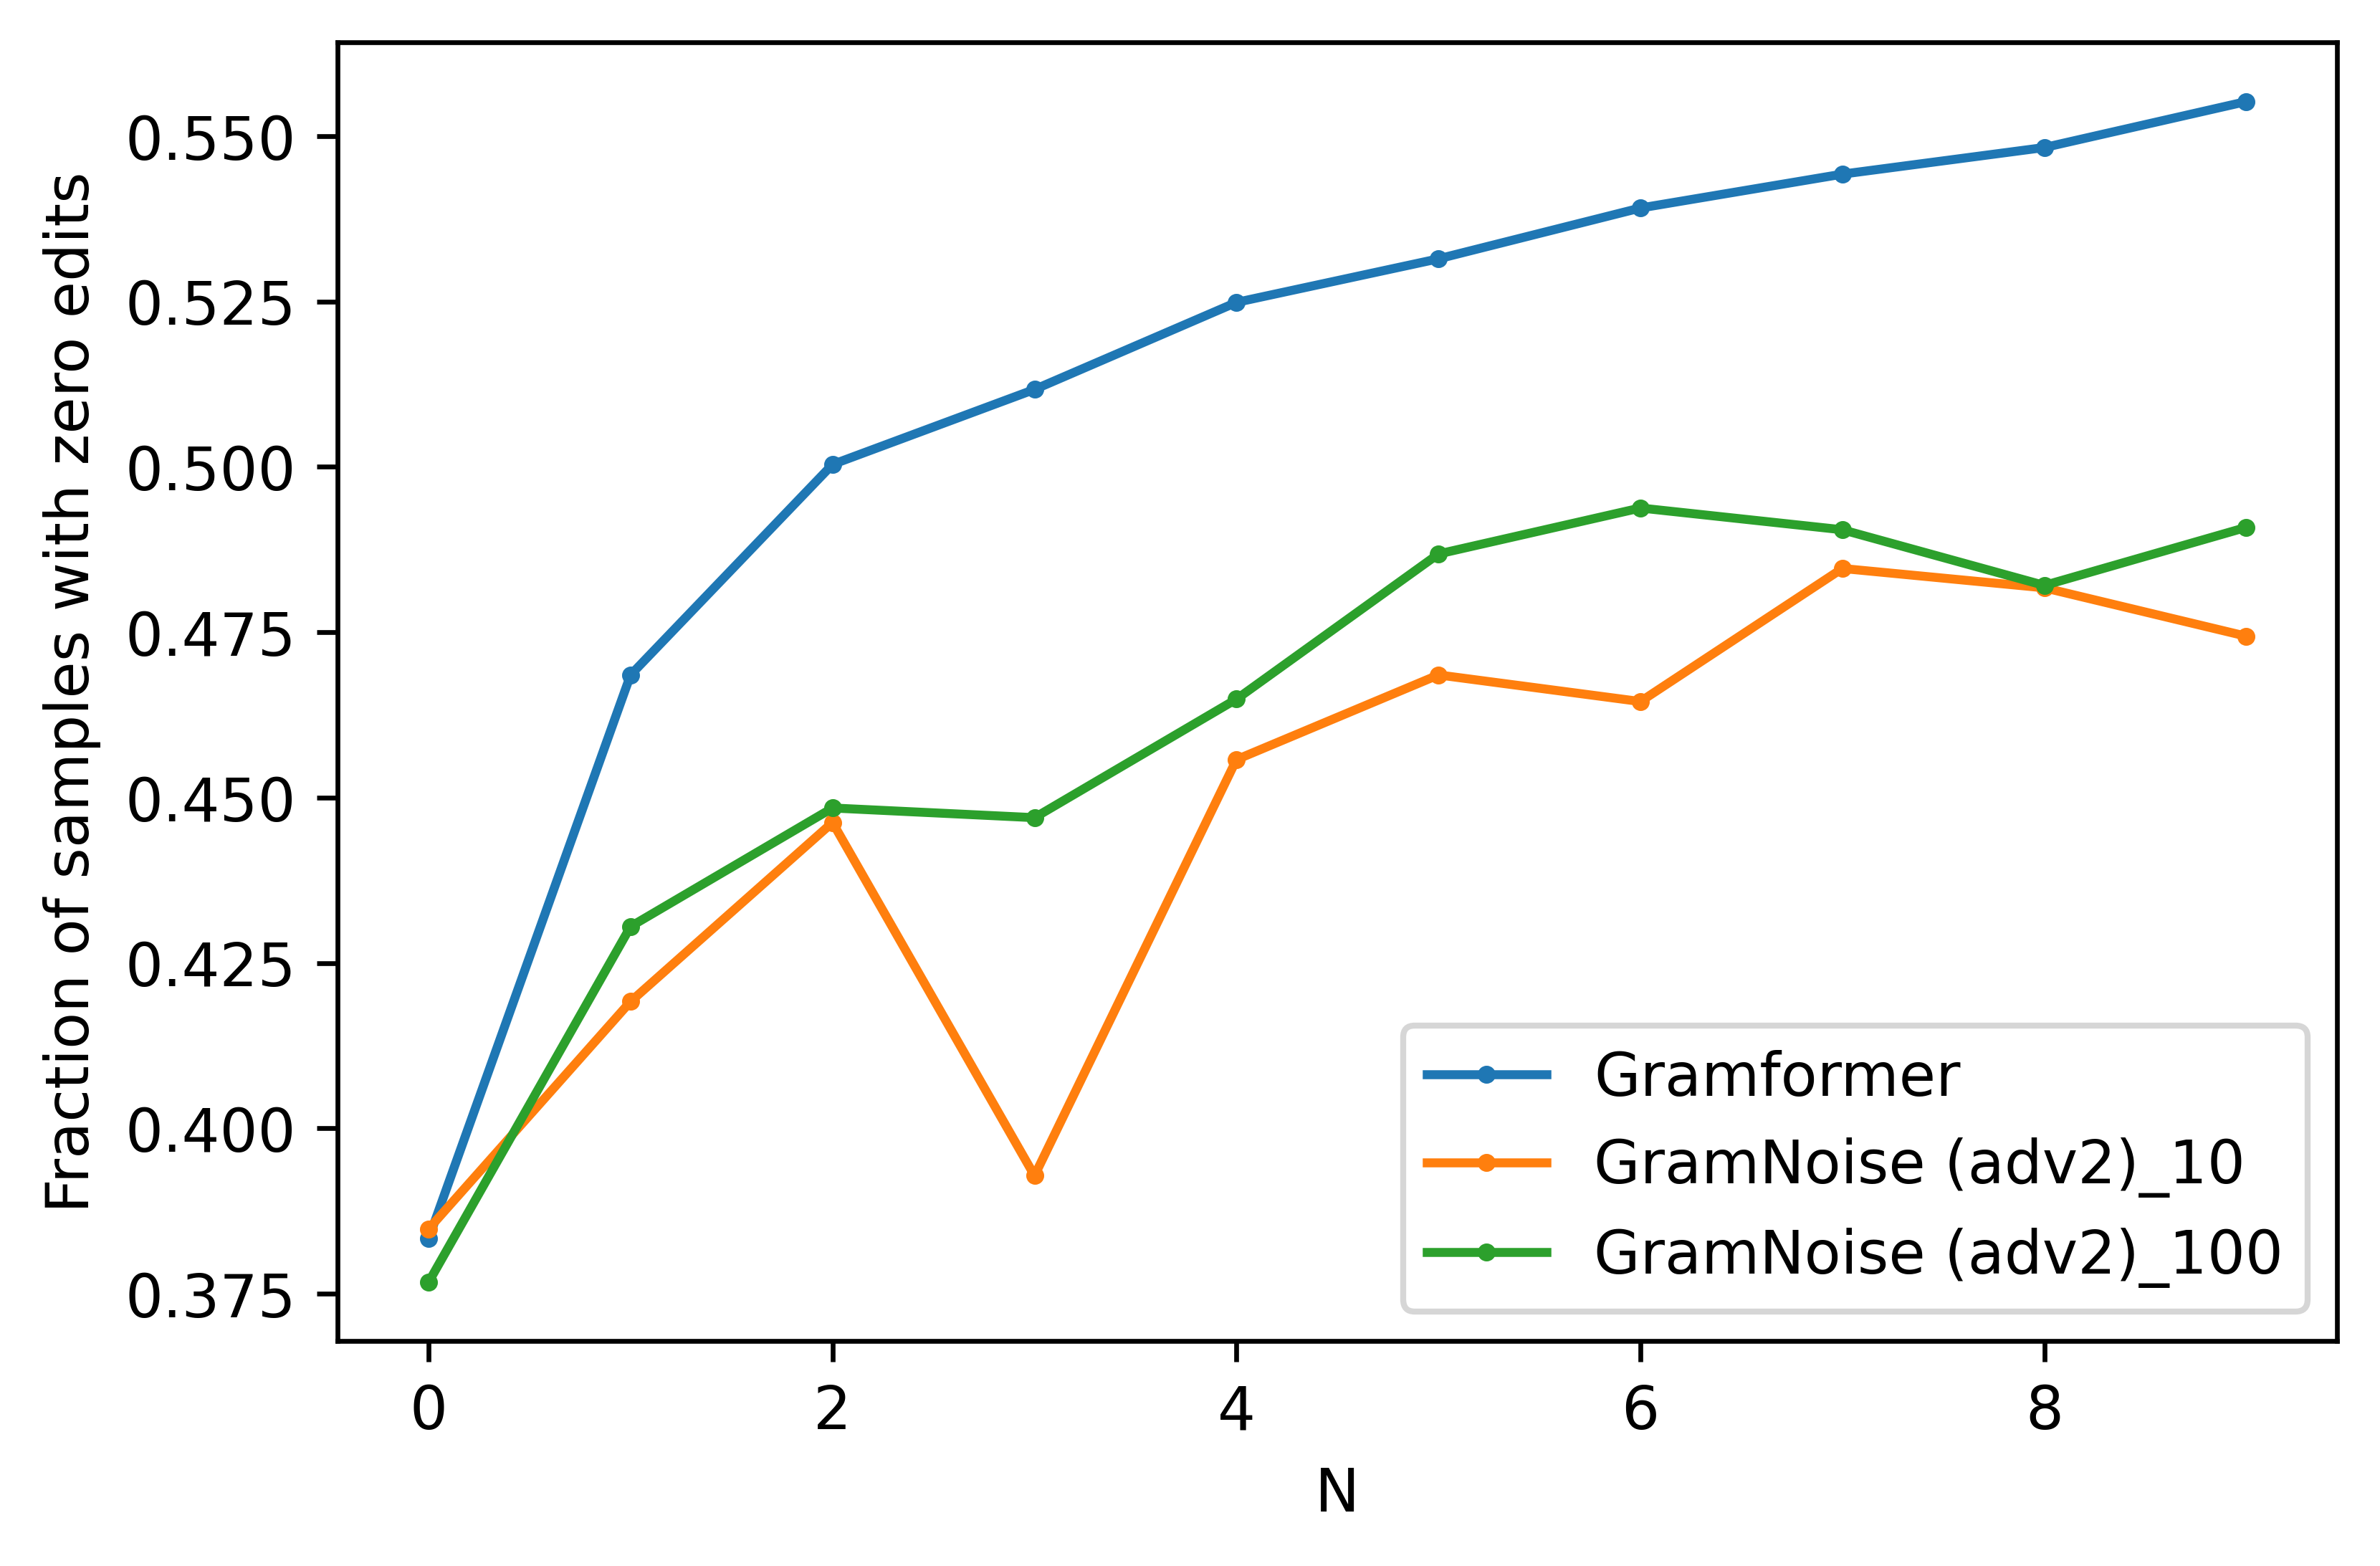

In [67]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)
ax.plot(df_v['length'], df_v['zero edit rate'], marker='o',markersize=2,label='Gramformer') # 作y1 = x 图，并标记此线名为linear
for i in [10,100]:
    df_selected = df[df['weight'] == i]
    ax.plot(df_selected['length'], df_selected['zero edit rate'], marker='o',markersize=2,label='GramNoise (adv2)'+"_"+str(i)) # 作y1 = x 图，并标记此线名为linear
ax.set_xlabel('N') #设置x轴名称 x label
ax.set_ylabel('Fraction of samples with zero edits') #设置y轴名称 y label
# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


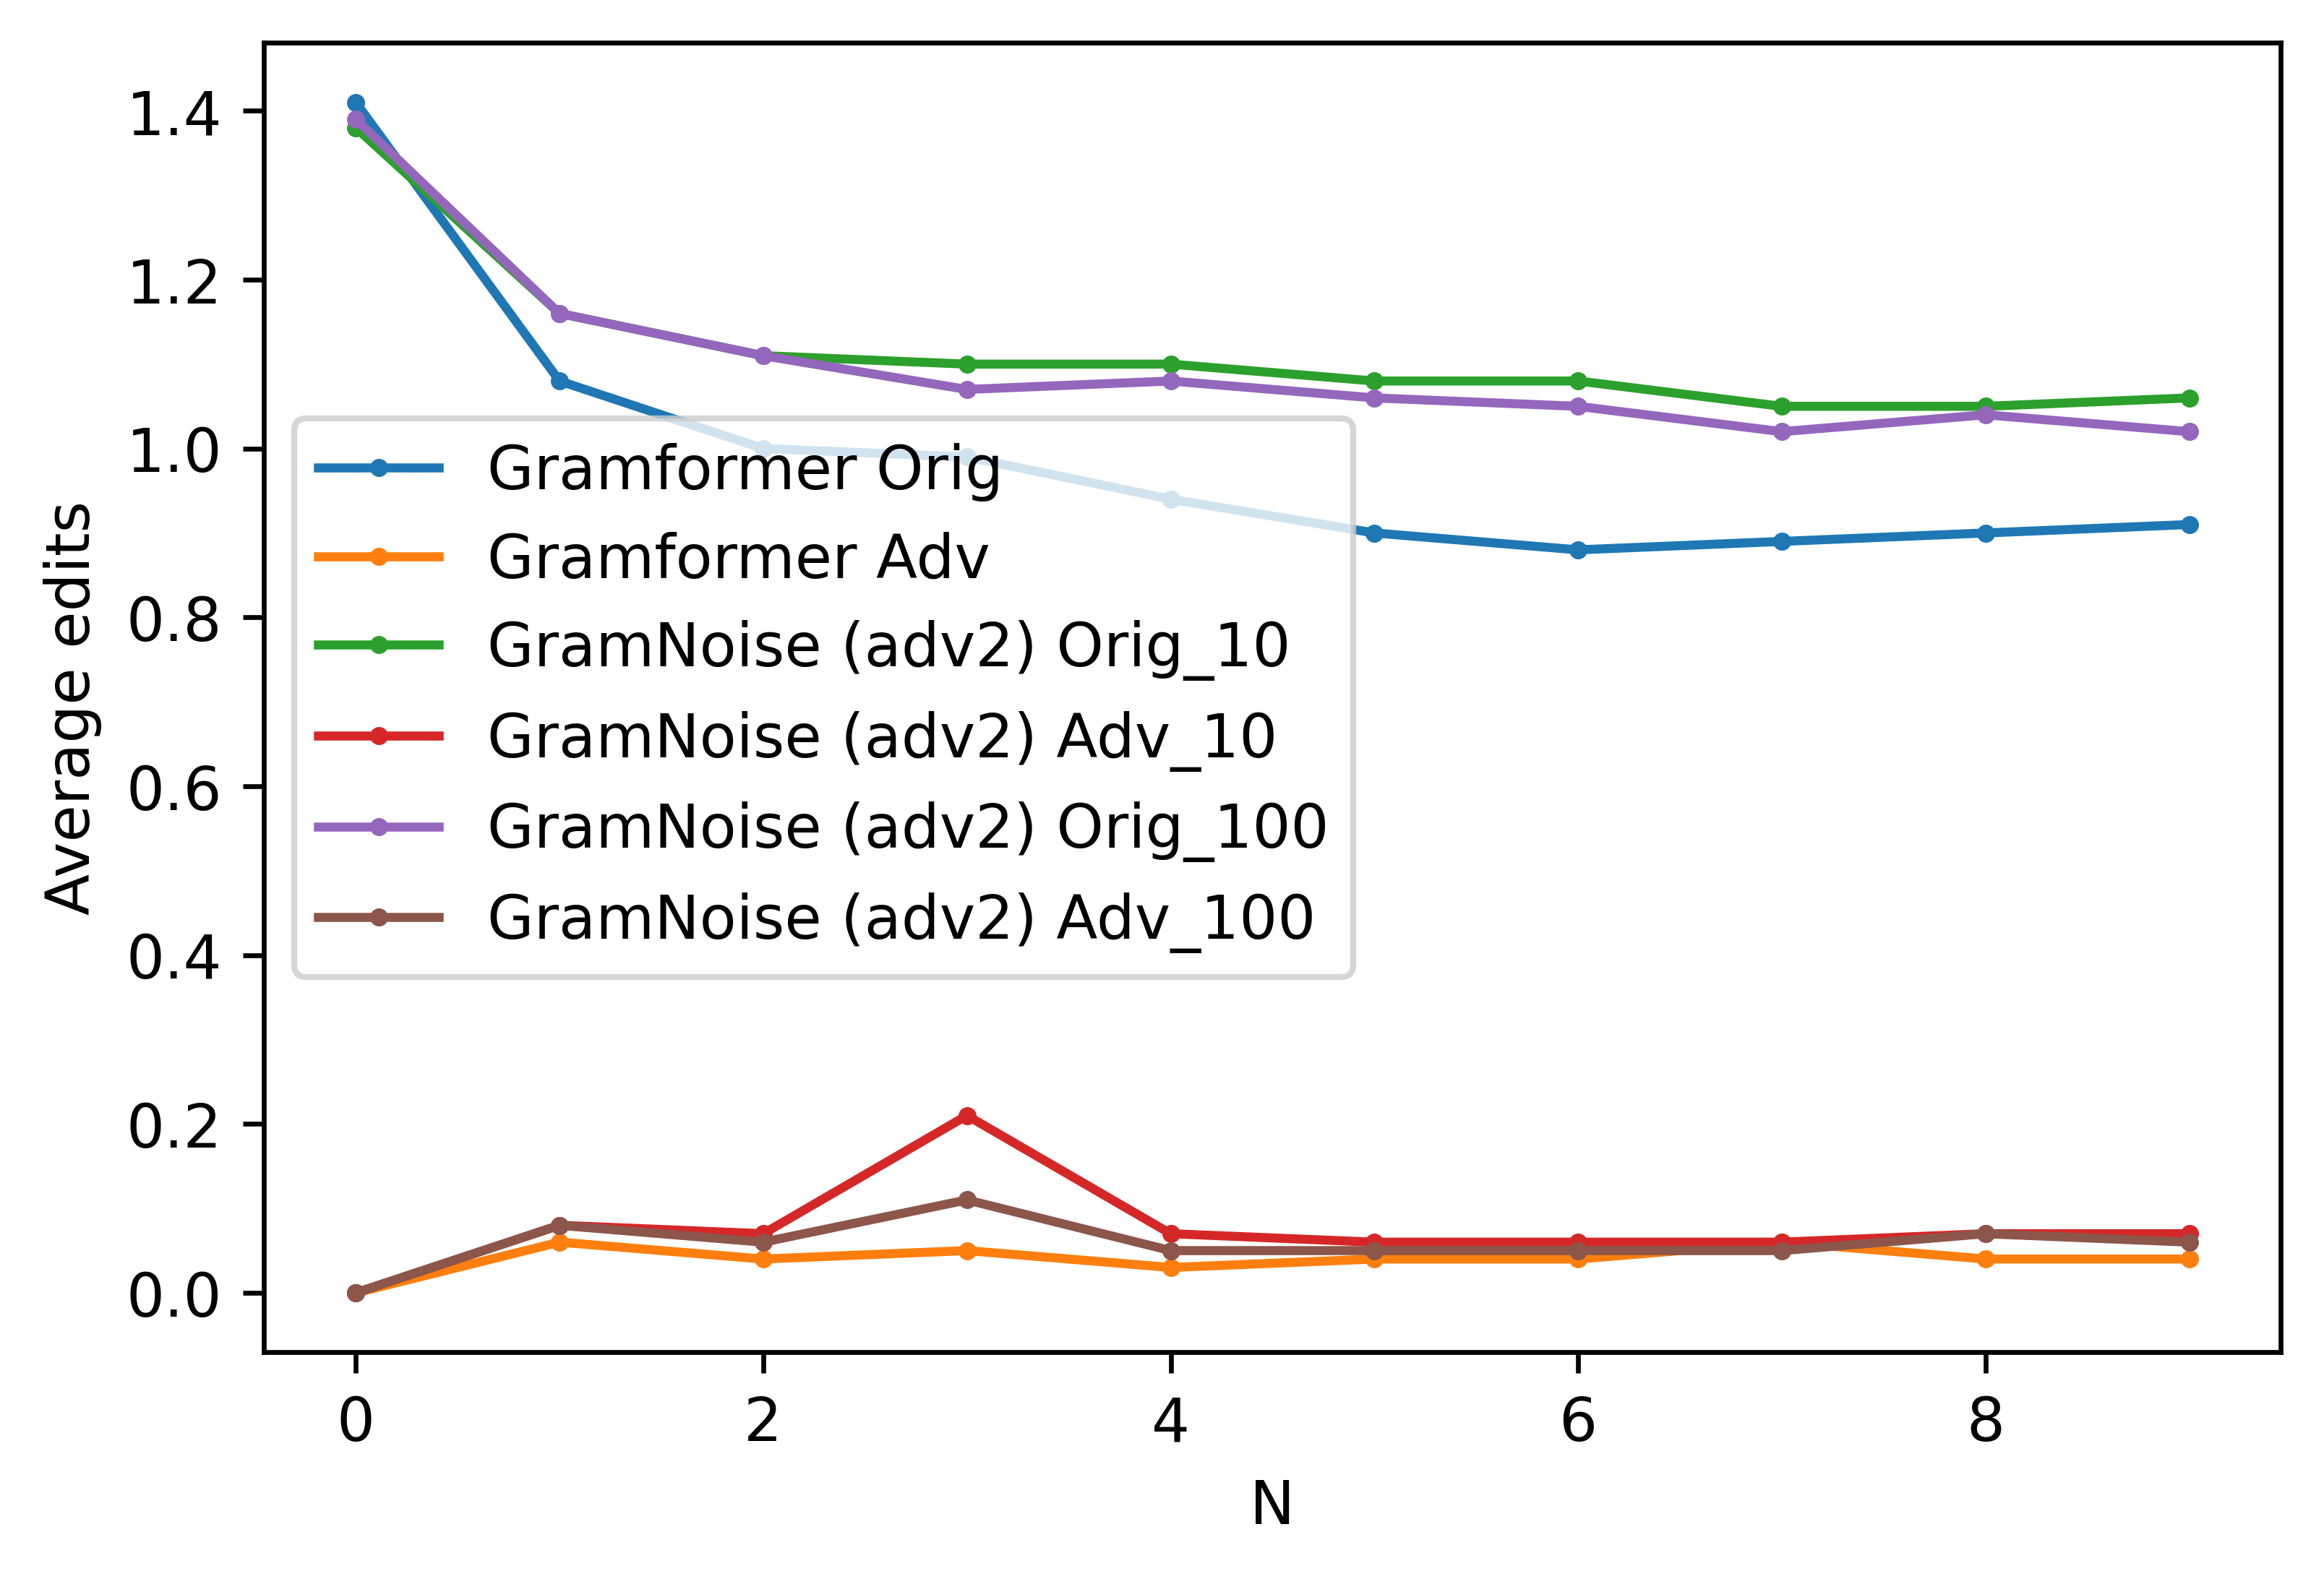

In [69]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)
ax.plot(df_v['length'], df_v['orig mean'].round(2), marker='o',markersize=2,label='Gramformer Orig') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_v['length'], df_v['adv mean'].round(2), marker='o',markersize=2,label='Gramformer Adv') # 作y1 = x 图，并标记此线名为linear


for i in [10,100]:
    df_selected = df[df['weight'] == i]
    ax.plot(df_selected['length'], df_selected['orig mean'].round(2), marker='o',markersize=2,label='GramNoise (adv2) Orig'+"_"+str(i)) # 作y1 = x 图，并标记此线名为linear
    ax.plot(df_selected['length'], df_selected['adv mean'].round(2), marker='o',markersize=2,label='GramNoise (adv2) Adv'+"_"+str(i)) # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('N') #设置x轴名称 x label
ax.set_ylabel('Average edits ') #设置y轴名称 y label
# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


## Gau 0.1

In [70]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/Gau_0.1_edit'
files = sorted(os.listdir(filePath))
files

['full_N1_with_adv_not_removed.txt',
 'full_N2_with_adv_not_removed.txt',
 'full_N3_with_adv_not_removed.txt',
 'full_N4_with_adv_not_removed.txt',
 'full_N5_with_adv_not_removed.txt',
 'full_N6_with_adv_not_removed.txt',
 'full_N7_with_adv_not_removed.txt',
 'full_N8_with_adv_not_removed.txt',
 'full_N9_with_adv_not_removed.txt',
 'orig_with_adv_not_removed.txt']

In [71]:
length = []
zero_edits = []
orig_mean = []
orig_std = []
adv_mean = []
adv_std = []

for file in files:
    if 'orig' in file:
        orig_file = file
print(filePath + '/' + orig_file)
# Orig
f = open(filePath + '/' + orig_file)
lines = f.readlines()[-3:]
length.append(0)
zero_edits.append(float(lines[0][61:].replace('\n','')))
sub_value = lines[1].split(' ')
orig_mean.append(float(sub_value[3].replace('\t','')))
orig_std.append(float(sub_value[5].replace('\n','')))
sub_value = lines[2].split(' ')
adv_mean.append(float(sub_value[3].replace('\t','')))
adv_std.append(float(sub_value[5].replace('\n','')))


for file in files:
    if 'Vyas' in file or 'orig' in file:
        continue
    length.append(int(file[6]))
    f = open(filePath + '/' + file)
    lines = f.readlines()[-3:]
    zero_edits.append(float(lines[0][61:].replace('\n','')))
    sub_value = lines[1].split(' ')
    orig_mean.append(float(sub_value[3].replace('\t','')))
    orig_std.append(float(sub_value[5].replace('\n','')))
    sub_value = lines[2].split(' ')
    adv_mean.append(float(sub_value[3].replace('\t','')))
    adv_std.append(float(sub_value[5].replace('\n','')))

data = {'length':length,
       'zero edit rate':zero_edits,
       'orig mean':orig_mean,
       'orig std':orig_std,
       'adv mean':adv_mean,
       'adv std':adv_std}
df_2 = pd.DataFrame(data)
df_2

/Users/yufanwang/Desktop/Study/Project/Data/Gau_0.1_edit/orig_with_adv_not_removed.txt


,length,zero edit rate,orig mean,orig std,adv mean,adv std
0,0,0.388442,1.380029,1.711560,0.000000,0.000000
1,1,0.435260,1.168252,1.579299,0.080102,0.271501
2,2,0.465984,1.104974,1.549155,0.053036,0.233735
3,3,0.473665,1.095830,1.570270,0.040600,0.199242
4,4,0.479151,1.063643,1.524399,0.035479,0.198382
5,5,0.496708,1.038771,1.535039,0.042063,0.219905
6,6,0.504023,1.018288,1.532080,0.042794,0.224703
7,7,0.508413,0.989759,1.478435,0.052670,0.261169
8,8,0.504023,1.055596,1.634063,0.051573,0.298630
9,9,0.502560,1.013899,1.515075,0.044257,0.227657


In [73]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/v003_0.1'
files = sorted(os.listdir(filePath))
files

['full_N1_with_adv_not_removed.txt',
 'full_N2_with_adv_not_removed.txt',
 'full_N3_with_adv_not_removed.txt',
 'full_N4_with_adv_not_removed.txt',
 'full_N5_with_adv_not_removed.txt',
 'full_N6_with_adv_not_removed.txt',
 'full_N7_with_adv_not_removed.txt',
 'full_N8_with_adv_not_removed.txt',
 'full_N9_with_adv_not_removed.txt',
 'orig_with_adv_not_removed.txt']

In [74]:
length = []
zero_edits = []
orig_mean = []
orig_std = []
adv_mean = []
adv_std = []

for file in files:
    if 'orig' in file:
        orig_file = file
print(filePath + '/' + orig_file)
# Orig
f = open(filePath + '/' + orig_file)
lines = f.readlines()[-3:]
length.append(0)
zero_edits.append(float(lines[0][61:].replace('\n','')))
sub_value = lines[1].split(' ')
orig_mean.append(float(sub_value[3].replace('\t','')))
orig_std.append(float(sub_value[5].replace('\n','')))
sub_value = lines[2].split(' ')
adv_mean.append(float(sub_value[3].replace('\t','')))
adv_std.append(float(sub_value[5].replace('\n','')))


for file in files:
    if 'Vyas' in file or 'orig' in file:
        continue
    length.append(int(file[6]))
    f = open(filePath + '/' + file)
    lines = f.readlines()[-3:]
    zero_edits.append(float(lines[0][61:].replace('\n','')))
    sub_value = lines[1].split(' ')
    orig_mean.append(float(sub_value[3].replace('\t','')))
    orig_std.append(float(sub_value[5].replace('\n','')))
    sub_value = lines[2].split(' ')
    adv_mean.append(float(sub_value[3].replace('\t','')))
    adv_std.append(float(sub_value[5].replace('\n','')))

data = {'length':length,
       'zero edit rate':zero_edits,
       'orig mean':orig_mean,
       'orig std':orig_std,
       'adv mean':adv_mean,
       'adv std':adv_std}
df_3 = pd.DataFrame(data)
df_3

/Users/yufanwang/Desktop/Study/Project/Data/v003_0.1/orig_with_adv_not_removed.txt


,length,zero edit rate,orig mean,orig std,adv mean,adv std
0,0,0.377469,1.361375,1.612356,0.000000,0.000000
1,1,0.416971,1.186540,1.546553,0.085589,0.279807
2,2,0.405267,1.182882,1.530344,0.094733,0.313418
3,3,0.348939,1.173372,1.489790,0.242136,0.431857
4,4,0.384418,1.160205,1.521384,0.151792,0.371903
5,5,0.417337,1.141185,1.508544,0.083760,0.299908
6,6,0.433797,1.142282,1.517269,0.109364,0.324790
7,7,0.423189,1.138990,1.507778,0.096196,0.325578
8,8,0.449159,1.125457,1.492507,0.069129,0.304818
9,9,0.431968,1.131675,1.502358,0.125457,0.402139


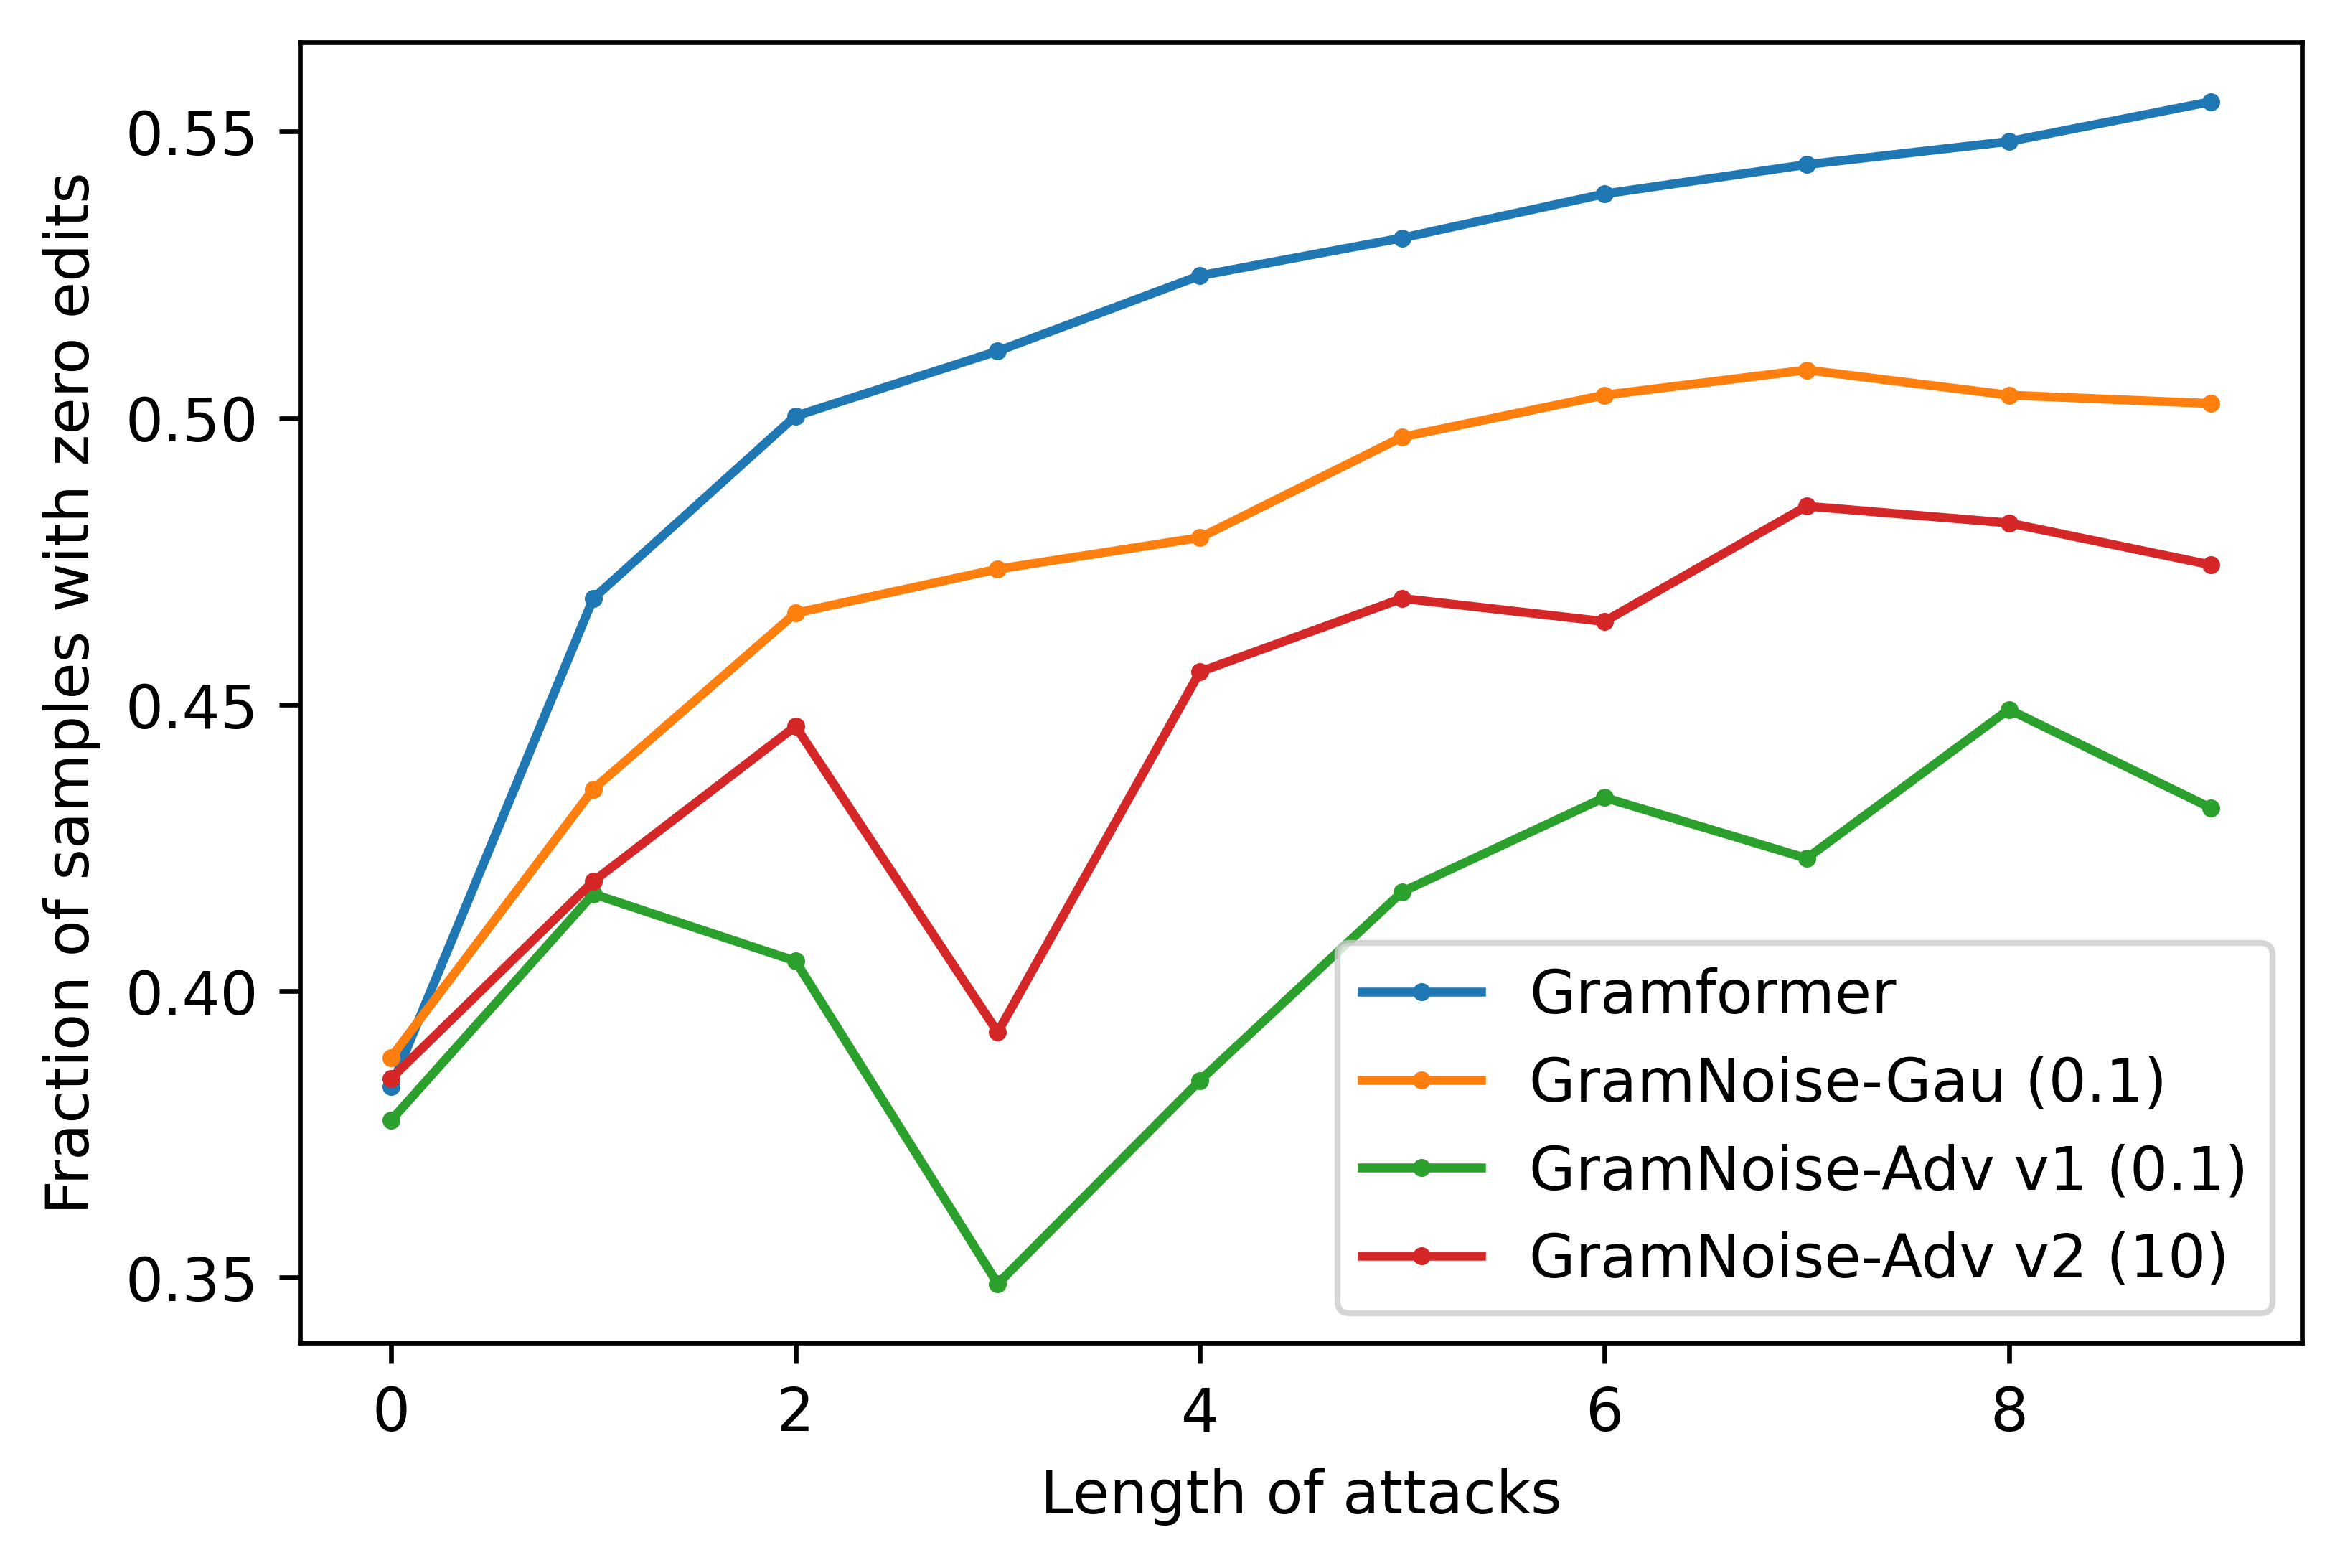

In [78]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600,figsize=(6,4))
ax.plot(df_v['length'], df_v['zero edit rate'], marker='o',markersize=2,label='Gramformer') # 作y1 = x 图，并标记此线名为linear
# ax.plot(df['length'], df['zero edit rate'], marker='o',markersize=2,label='Gramformer-Gau (1.5)') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_2['length'], df_2['zero edit rate'], marker='o',markersize=2,label='GramNoise-Gau (0.1)') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_3['length'], df_3['zero edit rate'], marker='o',markersize=2,label='GramNoise-Adv v1 (0.1)') # 作y1 = x 图，并标记此线名为linear
for i in [10]:
    df_selected = df[df['weight'] == i]
    ax.plot(df_selected['length'], df_selected['zero edit rate'], marker='o',markersize=2,label='GramNoise-Adv v2 (10)') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('Length of attacks') #设置x轴名称 x label
ax.set_ylabel('Fraction of samples with zero edits') #设置y轴名称 y label
# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


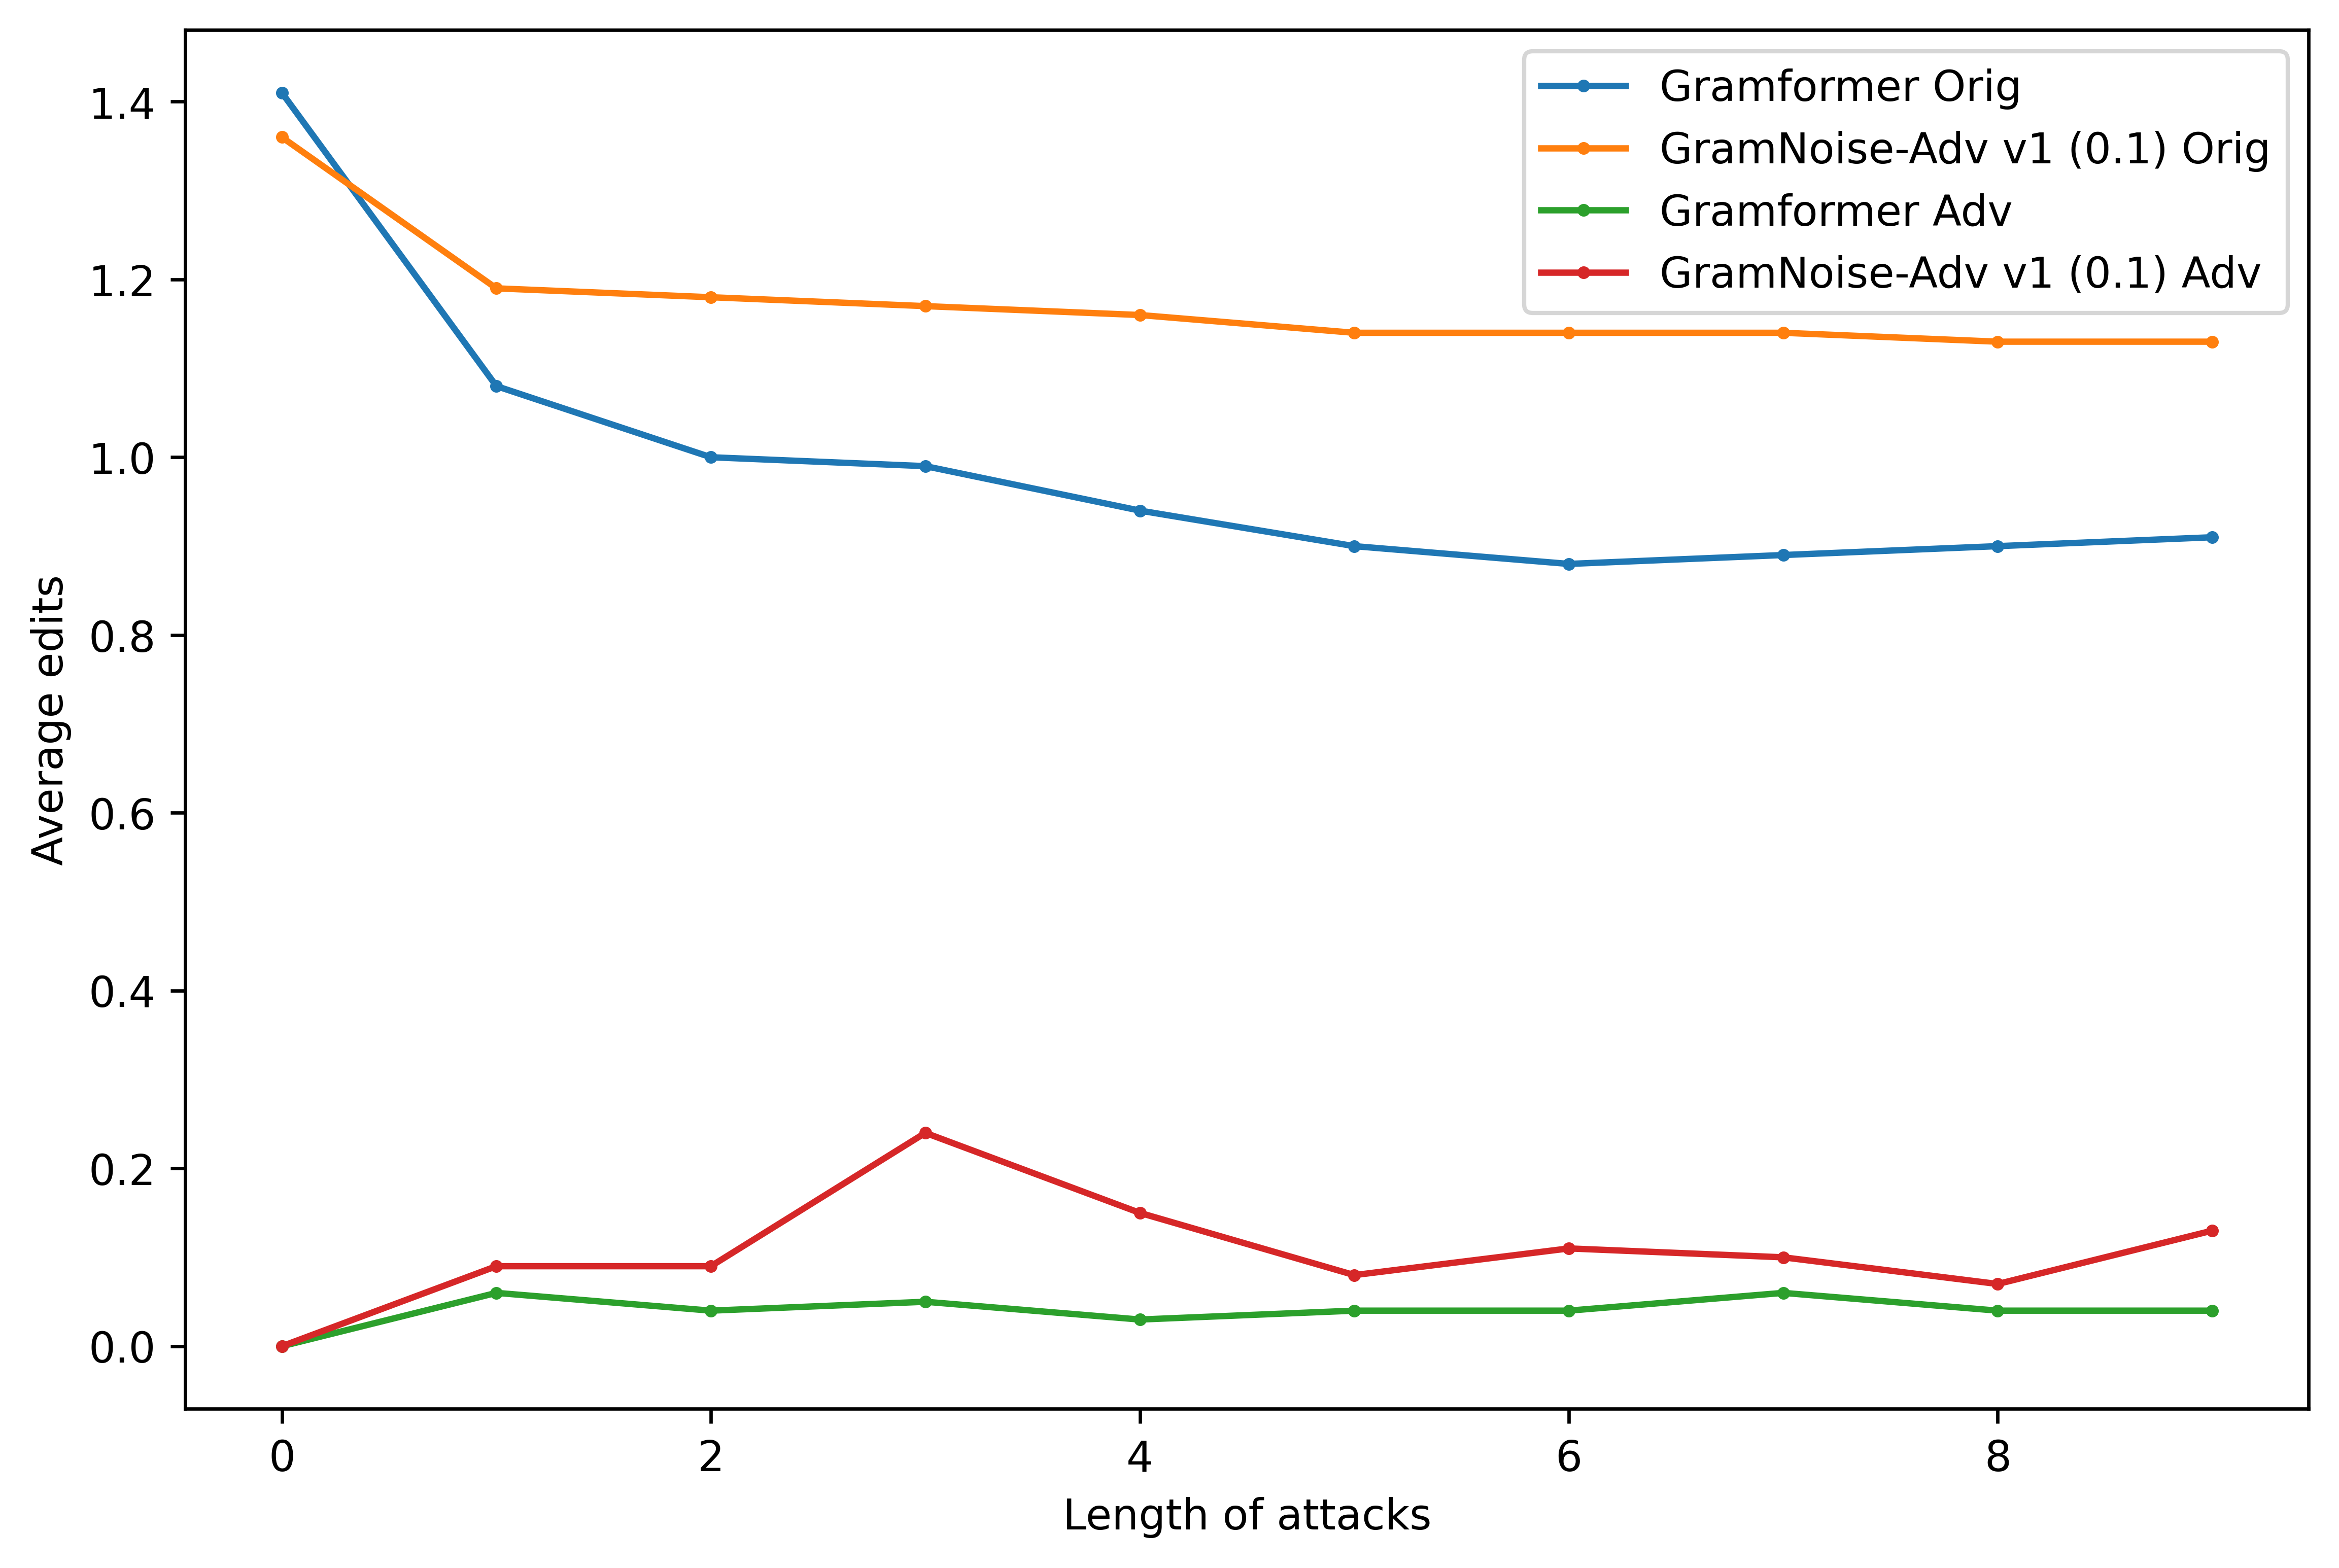

In [40]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600,figsize=(9,6))
ax.plot(df_v['length'], df_v['orig mean'].round(2), marker='o',markersize=2,label='Gramformer Orig') # 作y1 = x 图，并标记此线名为linear
# ax.plot(df['length'], df['orig mean'].round(2), marker='o',markersize=2,label='Gramformer-Gau Orig (1.5)') # 作y1 = x 图，并标记此线名为linear
# ax.plot(df_2['length'], df_2['orig mean'].round(2), marker='o',markersize=2,label='Gramformer-Gau Orig (0.1)') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_3['length'], df_3['orig mean'].round(2), marker='o',markersize=2,label='GramNoise-Adv v1 (0.1) Orig') # 作y1 = x 图，并标记此线名为linear


ax.plot(df_v['length'], df_v['adv mean'].round(2), marker='o',markersize=2,label='Gramformer Adv') # 作y1 = x 图，并标记此线名为linear
# ax.plot(df['length'], df['adv mean'].round(2), marker='o',markersize=2,label='Gramformer-Gau Adv (1.5)') # 作y1 = x 图，并标记此线名为linear
# ax.plot(df_2['length'], df_2['adv mean'].round(2), marker='o',markersize=2,label='Gramformer-Gau Adv (0.1)') # 作y1 = x 图，并标记此线名为linear
ax.plot(df_3['length'], df_3['adv mean'].round(2), marker='o',markersize=2,label='GramNoise-Adv v1 (0.1) Adv') # 作y1 = x 图，并标记此线名为linear

ax.set_xlabel('Length of attacks') #设置x轴名称 x label
ax.set_ylabel('Average edits') #设置y轴名称 y label
# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
# plt.xlim((0, 15))
# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化
